## 19.2.2 Build a Basic Neural Network

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

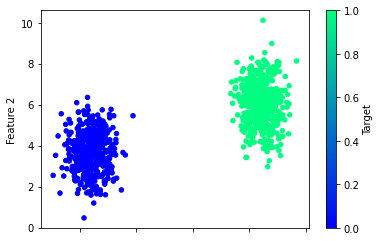

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset into TRAINING and TEST datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Normalize our dummy data

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model.
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## 19.2.3 Train and Test a Basic Neural Network

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 901us/step - loss: 0.6522 - accuracy: 0.8613
Epoch 2/100
24/24 [==============================] - 0s 808us/step - loss: 0.6440 - accuracy: 0.9987
Epoch 3/100
24/24 [==============================] - 0s 888us/step - loss: 0.6349 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 718us/step - loss: 0.6250 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 789us/step - loss: 0.6143 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 674us/step - loss: 0.6029 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 761us/step - loss: 0.5907 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 758us/step - loss: 0.5780 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 773us/step - loss: 0.5646 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 804us/step - loss: 0.5507 - accura

24/24 [==============================] - 0s 680us/step - loss: 0.0989 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 761us/step - loss: 0.0972 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 738us/step - loss: 0.0956 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 711us/step - loss: 0.0940 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 658us/step - loss: 0.0925 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 633us/step - loss: 0.0910 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 693us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 650us/step - loss: 0.0881 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 703us/step - loss: 0.0867 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 713us/step - loss: 0.0853 - accuracy: 

<AxesSubplot:>

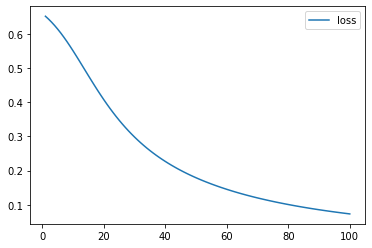

In [12]:
# Visualize our model's loss over the full 100 epochs:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

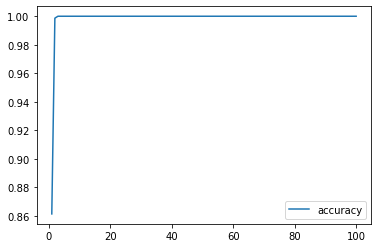

In [13]:
# Plot the accuracy over time.
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0685 - accuracy: 1.0000 - 105ms/epoch - 13ms/step
Loss: 0.06849271804094315, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## 19.2.4 Nuances of Neural Networks on Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

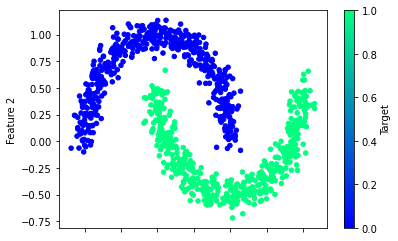

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data, using the fit method.
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8903 - accuracy: 0.5427
Epoch 2/100
24/24 [==============================] - 0s 987us/step - loss: 0.8048 - accuracy: 0.5733
Epoch 3/100
24/24 [==============================] - 0s 976us/step - loss: 0.7447 - accuracy: 0.5880
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.6027
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6133
Epoch 6/100
24/24 [==============================] - 0s 962us/step - loss: 0.6491 - accuracy: 0.6253
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6347
Epoch 8/100
24/24 [==============================] - 0s 997us/step - loss: 0.6120 - accuracy: 0.6440
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6533
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.6573
E

24/24 [==============================] - 0s 916us/step - loss: 0.2831 - accuracy: 0.8733
Epoch 82/100
24/24 [==============================] - 0s 994us/step - loss: 0.2820 - accuracy: 0.8733
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8747
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8747
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8773
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8800
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8800
Epoch 91/

<AxesSubplot:>

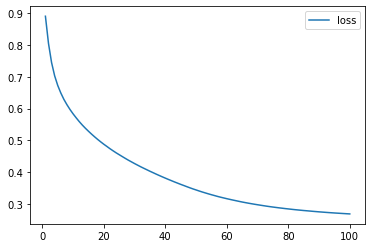

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

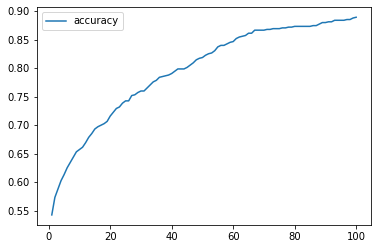

In [20]:
# Plot the accuracy.
history_df.plot(y="accuracy")

## 19.2.5 Create the Connective Tissue, the Multiple Neuron Neural Network

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 950us/step - loss: 0.6429 - accuracy: 0.6853
Epoch 2/100
24/24 [==============================] - 0s 825us/step - loss: 0.6107 - accuracy: 0.7093
Epoch 3/100
24/24 [==============================] - 0s 757us/step - loss: 0.5820 - accuracy: 0.7413
Epoch 4/100
24/24 [==============================] - 0s 756us/step - loss: 0.5564 - accuracy: 0.7587
Epoch 5/100
24/24 [==============================] - 0s 728us/step - loss: 0.5333 - accuracy: 0.7720
Epoch 6/100
24/24 [==============================] - 0s 628us/step - loss: 0.5121 - accuracy: 0.7880
Epoch 7/100
24/24 [==============================] - 0s 790us/step - loss: 0.4920 - accuracy: 0.7933
Epoch 8/100
24/24 [==============================] - 0s 786us/step - loss: 0.4730 - accuracy: 0.8173
Epoch 9/100
24/24 [==============================] - 0s 746us/step - loss: 0.4545 - accuracy: 0.8173
Epoch 10/100
24/24 [==============================] - 0s 746us/step - loss: 0.4371 - accura

24/24 [==============================] - 0s 649us/step - loss: 0.2492 - accuracy: 0.8893
Epoch 82/100
24/24 [==============================] - 0s 763us/step - loss: 0.2491 - accuracy: 0.8893
Epoch 83/100
24/24 [==============================] - 0s 744us/step - loss: 0.2490 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 696us/step - loss: 0.2490 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 758us/step - loss: 0.2488 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 757us/step - loss: 0.2489 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 839us/step - loss: 0.2487 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 716us/step - loss: 0.2487 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 758us/step - loss: 0.2486 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 710us/step - loss: 0.2486 - accuracy: 